# Heart Disease

[This database](https://www.kaggle.com/ronitf/heart-disease-uci/home) contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

![heart](../res/heart.jpg)

## Note

please use 75, 25 split with 0 random seed

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


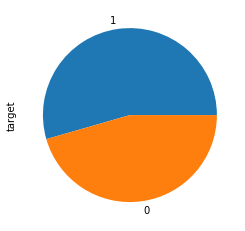

In [4]:
dataset['target'].value_counts().plot(kind='pie');

# Preprocessing

In [5]:
X = dataset.drop(['target'],axis=1)
y = dataset['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [101]:
def best_clf(clf ,params ,X_train, y_train, search_type='Grid'):
    randomized_search =RandomizedSearchCV(clf,params,n_jobs=-1,cv=3)
    grid_search = GridSearchCV(estimator = clf,param_grid = params,cv = 3,n_jobs = -1)
    
    if search_type == 'Grid':
        Grid_search = grid_search.fit(X_train,y_train)
        return Grid_search
    elif search_type == 'Random':
        Random_search = randomized_search.fit(X_train,y_train)
        return Random_search

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
clfs = [KNeighborsClassifier(), SGDClassifier(), SVC(),LogisticRegression(class_weight='balanced')]

params = [[{'n_neighbors':[5,7,9,11,12,15]
            , 'weights':['uniform','distance']
            ,'algorithm':['auto','ball_tree','kd_tree', 'brute']
            ,'leaf_size':[30,40,50]}]
          
         ,[{"penalty": ["l1", "l2", "elasticnet"]
               ,"loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
               ,'alpha':[0.0001,0.001,0.01]}]
          
          ,[{'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
          , [{'penalty':['l2','l1','elasticnet']}]]

best_Score = {'clf':None ,'param' : None, 'score':0}
for clf,param in zip(clfs,params):
    search = best_clf(clf,param,X_train, Y_train)
    print(search.best_score_)
    if search.best_score_ >= best_Score['score']:
        best_Score['score'] = search.best_score_
        best_Score['clf'] = clf
        best_Score['param'] = search.best_params_
        
print(best_Score)

0.8306069958847736
0.8306584362139917
0.81820987654321
0.8140432098765432
{'clf': SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False), 'param': {'alpha': 0.01, 'loss': 'squared_hinge', 'penalty': 'elasticnet'}, 'score': 0.8306584362139917}


In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
clfs = [KNeighborsClassifier(), SGDClassifier(), SVC(),LogisticRegression(class_weight='balanced')]

params = [[{'n_neighbors':[5,7,9,11,12,15]
            , 'weights':['uniform','distance']
            ,'algorithm':['auto','ball_tree','kd_tree', 'brute']
            ,'leaf_size':[30,40,50]}]
          
         ,[{"penalty": ["l1", "l2", "elasticnet"]
               ,"loss":["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]
               ,'alpha':[0.0001,0.001,0.01]}]
          
          ,[{'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
          , [{'penalty':['l2','l1','elasticnet']}]]

best_Score = {'clf':None ,'param' : None, 'score':0}
for clf,param in zip(clfs,params):
    search = best_clf(clf,param,X_train, Y_train,search_type='Random')
    print(search.best_score_)
    if search.best_score_ >= best_Score['score']:
        best_Score['score'] = search.best_score_
        best_Score['clf'] = clf
        best_Score['param'] = search.best_params_
        
print(best_Score)

0.8223251028806584
0.818261316872428
0.81820987654321
0.8140432098765432
{'clf': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), 'param': {'weights': 'distance', 'n_neighbors': 12, 'leaf_size': 40, 'algorithm': 'ball_tree'}, 'score': 0.8223251028806584}


/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/home/mohamedalgebali/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


# As we've shown that SGDClassifier is the best one

In [110]:
sgd = SGDClassifier(alpha= 0.01, loss= 'squared_hinge', penalty= 'elasticnet')
sgd.fit(X_train,Y_train)
sgd.score(X_train,Y_train)

0.8429752066115702

In [111]:
accuracies = cross_val_score(estimator=sgd,X=X_train,y=Y_train,cv=3)
print(accuracies)
print(accuracies.mean())

[0.79012346 0.86419753 0.8625    ]
0.838940329218107


In [112]:
sgd.score(X_test,Y_test)

0.8688524590163934

# Conclusion:
### If i want to deploy this model I'll deploy it as a model with accuracy 86.8 % 

In [11]:
svc = SVC()
svc.fit(X_train,Y_train)
svc.score(X_train,Y_train)

0.9338842975206612

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, svc.predict(X_test)))
pd.DataFrame(confusion_matrix(Y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



,0,1
0,19,9
1,6,27


In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
knn.score(X_train,Y_train)

0.8677685950413223

In [18]:
print(classification_report(Y_test, knn.predict(X_test)))
pd.DataFrame(confusion_matrix(Y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



,0,1
0,20,8
1,7,26


In [106]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=svc,X=X_train,y=Y_train,cv=3)
print(accuracies)
print(accuracies.mean())

[0.75308642 0.85185185 0.8       ]
0.8016460905349794


In [107]:
accuracies = cross_val_score(estimator=knn,X=X_train,y=Y_train,cv=3)
print(accuracies)
print(accuracies.mean())

[0.81481481 0.80246914 0.8375    ]
0.818261316872428


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train,Y_train)
print(classification_report(Y_test, rf.predict(X_test)))
pd.DataFrame(confusion_matrix(Y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



,0,1
0,20,8
1,5,28


In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
print(classification_report(Y_test, xgb.predict(X_test)))
pd.DataFrame(confusion_matrix(Y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



,0,1
0,19,9
1,3,30


## XGB is the best one because recall of class 1 (deseased class) is the lowest one, and deseased class is important because if I classified that this person is not sick but he is not this is very dangerous